In [2]:
# Load the data
import os
from sklearn import preprocessing, metrics

# Parameters
do_grid_search_cv = True
do_pca = False
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import os
from keras import Sequential
from keras.layers import Dense, Dropout
from sklearn import preprocessing, metrics

# Parameters
do_grid_search_cv = True
do_pca = False

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def read_data(path, filename):
    return pd.read_csv(os.path.join(path, filename))

original_data = read_data('C:/Users/Mirela/PycharmProjects/Hotel Booking/hotel-booking-demand', 'hotel_bookings.csv')

print(original_data.head())
print(original_data.dtypes)

print(original_data.isna().sum())
original_data = original_data.dropna()
print(original_data.head())



Using TensorFlow backend.


          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [3]:
# Encode the categorical features as numbers
result = original_data.copy()
encoders = {}
for column in result.columns:

    if result.dtypes[column] == pd.np.object:
        encoders[column] = preprocessing.LabelEncoder()
        result[column] = encoders[column].fit_transform(result[column])

features = result
feature_names = features.columns.get_values()
print(features.head())

      hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
2392      1            0          6               2015                  10   
2697      1            0         24               2015                  10   
2867      1            0         24               2015                   9   
2877      1            0         24               2015                   9   
2878      1            0         24               2015                   9   

      arrival_date_week_number  arrival_date_day_of_month  \
2392                        42                         11   
2697                        44                         26   
2867                        45                          3   
2877                        45                          3   
2878                        45                          3   

      stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
2392                        2                     0       2  ...   
2697                        

In [4]:
# Labels are the values we want to predict
labels = np.array(features['reservation_status']) # Create an array.

# Remove the labels from the features
# axis 1 refers to the columns

features = features.drop('reservation_status', axis=1) #  Remove columns by specifying label names and coresponding axis

In [5]:
# data normalization
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
features = normalizer.fit_transform(features)

In [6]:
# Using Skicit-learn to split data into training and testing sets

from sklearn.model_selection import train_test_split

# Split data into random train and test subsets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.3,
                                                                            random_state=42)
# returns list containing train-test split of inputs.

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (151, 31)
Training Labels Shape: (151,)
Testing Features Shape: (66, 31)
Testing Labels Shape: (66,)


In [7]:
num_classes = np.max(train_labels) + 1
print(num_classes, 'classes')

3 classes


In [9]:
import os
from keras import Sequential
from keras.layers import Dense, Dropout
from sklearn import preprocessing, metrics

input_dimensions = train_features.shape[1]
optimizer = 'rmsprop'
dropout = 0.05
model = Sequential()
inner_nodes = int(input_dimensions / 2)

model.add(Dense(inner_nodes, kernel_initializer='uniform', activation='relu', input_dim=input_dimensions))
model.add(Dropout(rate=dropout))
model.add(Dense(inner_nodes, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(rate=dropout))
model.add(Dense(num_classes, kernel_initializer='uniform', activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
                  metrics=['accuracy'])


In [10]:
model.summary()

example_batch = train_features[:15]
example_result = model.predict(example_batch)#Generates output predictions for the input samples.
print(example_result)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 15)                480       
_________________________________________________________________
dropout_3 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 15)                240       
_________________________________________________________________
dropout_4 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 48        
Total params: 768
Trainable params: 768
Non-trainable params: 0
_________________________________________________________________
[[0.33334476 0.33334547 0.3333098 ]
 [0.3333442  0.3333466  0.3333092 ]
 [0.33334452 0.33334592 0.33330953]
 [0.33334625 0

In [11]:
EPOCHS = 20

history = model.fit(
  train_features, train_labels,
  epochs=EPOCHS, batch_size=512, validation_split = 0.2, verbose=0)#Trains the model for a given number of epochs (iterations on a dataset)

In [12]:
# Visualize the training progress
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist.tail())

    val_loss  val_accuracy      loss  accuracy  epoch
15  1.044074           1.0  1.055210       0.9     15
16  1.040438           1.0  1.051919       0.9     16
17  1.036758           1.0  1.049279       0.9     17
18  1.032951           1.0  1.045809       0.9     18
19  1.029045           1.0  1.042485       0.9     19


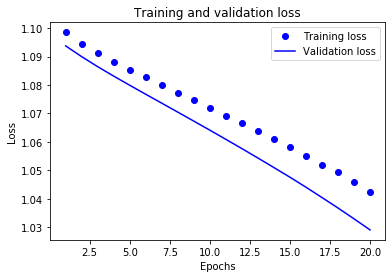

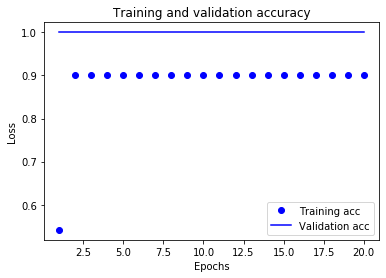

In [13]:
#Plotting the training and validation loss

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plotting the training and validation accuracy

plt.clf() 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
results = model.evaluate(test_features, test_labels)

print(results)

66/66 [==============================] - 0s 60us/step
[1.0371307098504268, 0.9242424368858337]


In [15]:
predictions = model.predict(test_features)


In [16]:
predictions[0].shape

(3,)

In [17]:
np.sum(predictions[0])

1.0

In [18]:
np.argmax(predictions[0])

1